In [2]:
from jupyterthemes import jtplot
jtplot.style('onedork')

In [3]:
import os
import sys
sys.path.insert(0, "D:/playground/data-science//libs")
from simulation_core import Simulation

86400 24 3600


Setting up the simulations parameters, with identifying their paths

In [5]:
acab_weth_sim = Simulation(experiment_id=1, x_name='ACAB', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_')
cat_weth_sim = Simulation(experiment_id=2, x_name='CAT', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_')
dog_weth_sim = Simulation(experiment_id=3, x_name='DOG', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_')
lady_weth_sim = Simulation(experiment_id=4, x_name='LADY', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_')
nfd_weth_sim = Simulation(experiment_id=5, x_name='NFD', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_')
tiara_weth_sim = Simulation(experiment_id=6, x_name='TIARA', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_')

**IMPORTANT: launch those simulations only if there are no data in package ```data/real_transactions```, otherwise skip this part** 

In [ ]:
# running the simulations through the data
acab_weth_sim.run_simulation(False, True)
cat_weth_sim.run_simulation(False, True)
dog_weth_sim.run_simulation(True, True)
lady_weth_sim.run_simulation(False, True)
nfd_weth_sim.run_simulation(True, True)
tiara_weth_sim.run_simulation(True, True)

Loading the simulation results into different dataframes depending on their data.

In [6]:
# ACAB/WETH
acab_weth_swaps_mitigation_off_df, acab_weth_mints_mitigation_off_df, acab_weth_burns_mitigation_off_df = acab_weth_sim.read_simulation(0)
acab_weth_swaps_mitigation_on_df, acab_weth_mints_mitigation_on_df, acab_weth_burns_mitigation_on_df = acab_weth_sim.read_simulation(1)

# CAT/WETH
cat_weth_swaps_mitigation_off_df, cat_weth_mints_mitigation_off_df, cat_weth_burns_mitigation_off_df = cat_weth_sim.read_simulation(0)
cat_weth_swaps_mitigation_on_df, cat_weth_mints_mitigation_on_df, cat_weth_burns_mitigation_on_df = cat_weth_sim.read_simulation(1)

# DOG/WETH
dog_weth_swaps_mitigation_off_df, dog_weth_mints_mitigation_off_df, dog_weth_burns_mitigation_off_df = dog_weth_sim.read_simulation(0)
dog_weth_swaps_mitigation_on_df, dog_weth_mints_mitigation_on_df, dog_weth_burns_mitigation_on_df = dog_weth_sim.read_simulation(1)

# LADY/WETH
lady_weth_swaps_mitigation_off_df, lady_weth_mints_mitigation_off_df, lady_weth_burns_mitigation_off_df = lady_weth_sim.read_simulation(0)
lady_weth_swaps_mitigation_on_df, lady_weth_mints_mitigation_on_df, lady_weth_burns_mitigation_on_df = lady_weth_sim.read_simulation(1)

# NFD/WETH
nfd_weth_swaps_mitigation_off_df, nfd_weth_mints_mitigation_off_df, nfd_weth_burns_mitigation_off_df = nfd_weth_sim.read_simulation(0)
nfd_weth_swaps_mitigation_on_df, nfd_weth_mints_mitigation_on_df, nfd_weth_burns_mitigation_on_df = nfd_weth_sim.read_simulation(1)

# TIARA/WETH
tiara_weth_swaps_mitigation_off_df, tiara_weth_mints_mitigation_off_df, tiara_weth_burns_mitigation_off_df = tiara_weth_sim.read_simulation(0)
tiara_weth_swaps_mitigation_on_df, tiara_weth_mints_mitigation_on_df, tiara_weth_burns_mitigation_on_df = tiara_weth_sim.read_simulation(1)

# ACAB/WETH pool

Current pool contains a too small transaction history (only 15 transactions) where can be seen that some of transactions were blocked due to the not enough reserves amount in the transaction amount. There are no mitigation blocks performed and to ensure that simuation performed correctly after next cell will be reviewed situation with mints and burns

Original ACAB/WETH pool has next statuses counts:
SUCCESS                11
NOT_ENOUGH_RESERVES     4
Name: status, dtype: int64
Mitigated ACAB/WETH dataframe has next statuses counts:
SUCCESS                11
NOT_ENOUGH_RESERVES     4
Name: status, dtype: int64
TWAP unavailability ratio for ACAB/WETH is 0.13333333333333333
Mitigated ACAB/WETH dataframe has next Mitigator statuses:


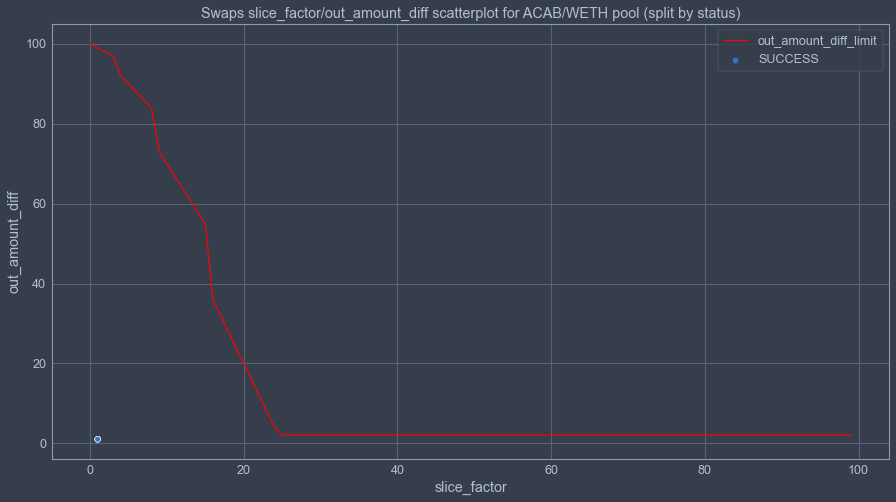

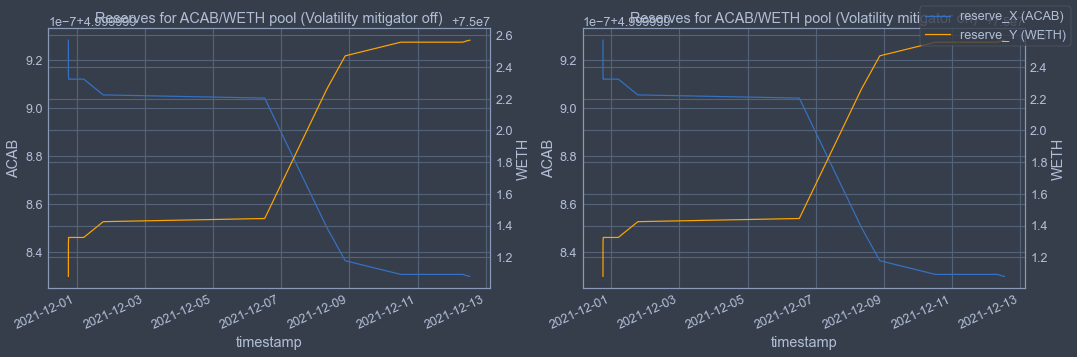

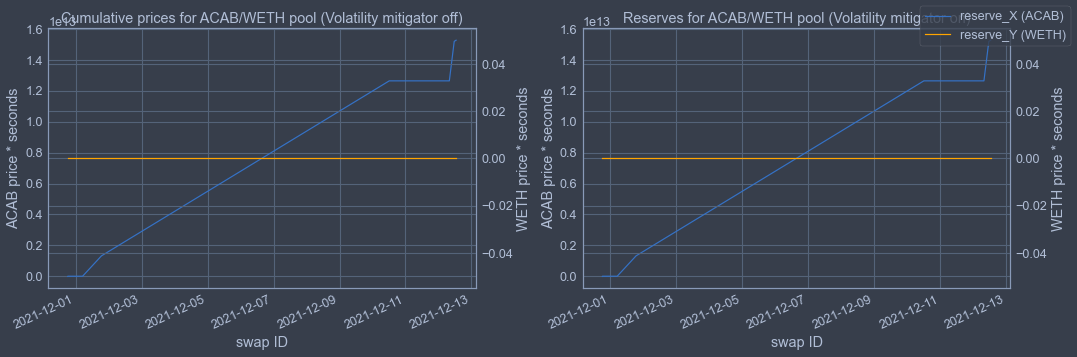

In [7]:
acab_weth_sim.show_mitigation_comparison(acab_weth_swaps_mitigation_off_df, acab_weth_swaps_mitigation_on_df)
acab_weth_sim.px_hist_blocked_transactions_slice(acab_weth_swaps_mitigation_on_df)
acab_weth_sim.px_hist_blocked_transactions_difference_from_oracle(acab_weth_swaps_mitigation_on_df)
acab_weth_sim.plot_slice_distribution_and_diff_limit_line(acab_weth_swaps_mitigation_on_df)
acab_weth_sim.plot_reserves_with_and_without_mitigation(acab_weth_swaps_mitigation_off_df, acab_weth_swaps_mitigation_on_df)
acab_weth_sim.plot_cumulative_prices_with_and_without_mitigation(acab_weth_swaps_mitigation_off_df, acab_weth_swaps_mitigation_off_df)

id  X_amount    Y_amount   timestamp   status  block_number  \
0   0       5.0  75000000.0  1638295941  SUCCESS             0   

   block_timestamp  transaction_timestamp  transaction_id  reserve_X_before  \
0       1638295941             1638295941               0               0.0   

   ...  k_before  price_X_cumulative_before  price_Y_cumulative_before  \
0  ...       0.0                          0                          0   

   is_volatility_mitigator_on_before  reserve_X   reserve_Y            k  \
0                               True        5.0  75000000.0  375000000.0   

   price_X_cumulative  price_Y_cumulative  is_volatility_mitigator_on  
0                   0                   0                        True  

[1 rows x 21 columns]

# CAT/WETH pool

Original CAT/WETH pool has next statuses counts:
SUCCESS    45
Name: status, dtype: int64
Mitigated CAT/WETH dataframe has next statuses counts:
SUCCESS    45
Name: status, dtype: int64
TWAP unavailability ratio for CAT/WETH is 0.13333333333333333
Mitigated CAT/WETH dataframe has next Mitigator statuses:


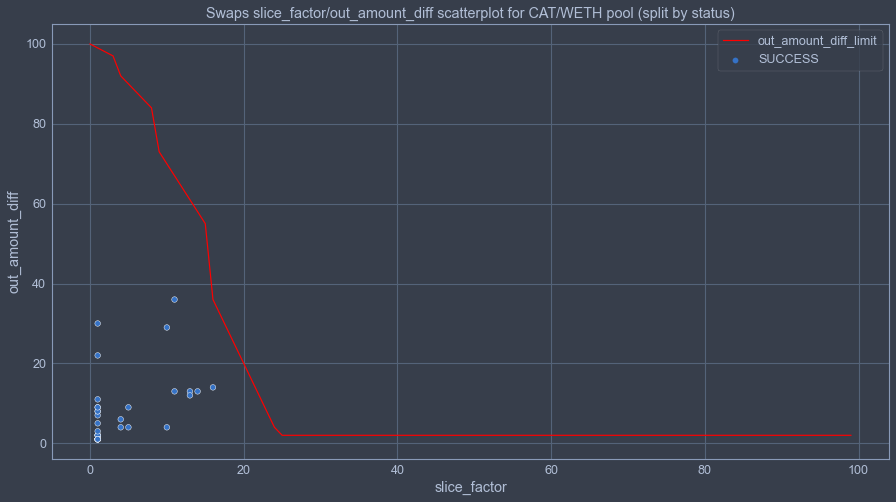

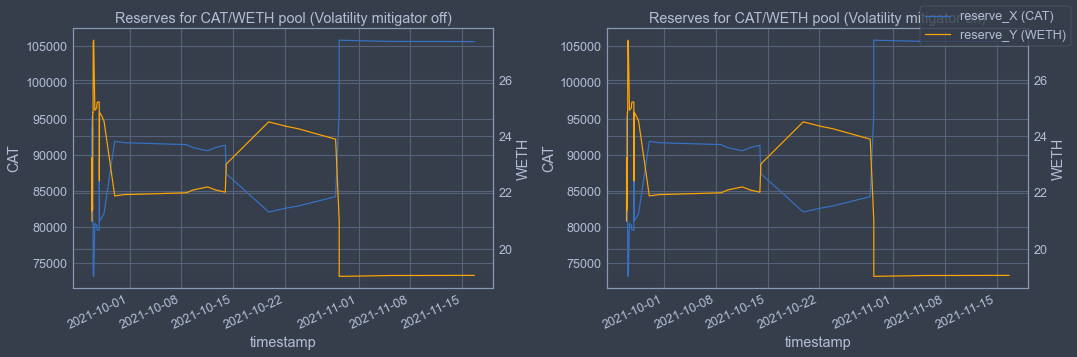

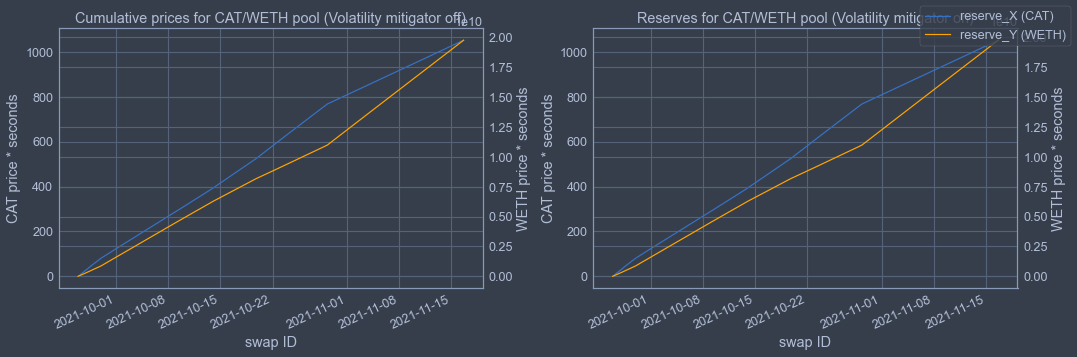

In [8]:
cat_weth_sim.show_mitigation_comparison(cat_weth_swaps_mitigation_off_df, cat_weth_swaps_mitigation_on_df)
cat_weth_sim.px_hist_blocked_transactions_slice(cat_weth_swaps_mitigation_on_df)
cat_weth_sim.px_hist_blocked_transactions_difference_from_oracle(cat_weth_swaps_mitigation_on_df)
cat_weth_sim.plot_slice_distribution_and_diff_limit_line(cat_weth_swaps_mitigation_on_df)
cat_weth_sim.plot_reserves_with_and_without_mitigation(cat_weth_swaps_mitigation_off_df, cat_weth_swaps_mitigation_on_df)
cat_weth_sim.plot_cumulative_prices_with_and_without_mitigation(cat_weth_swaps_mitigation_off_df, cat_weth_swaps_mitigation_off_df)

# DOG/WETH

Original DOG/WETH pool has next statuses counts:
SUCCESS    18559
Name: status, dtype: int64
Mitigated DOG/WETH dataframe has next statuses counts:
SUCCESS                             18558
BLOCKED_BY_VOLATILITY_MITIGATION        1
Name: status, dtype: int64
TWAP unavailability ratio for DOG/WETH is 0.00010776442696265962
Mitigated DOG/WETH dataframe has next Mitigator statuses:


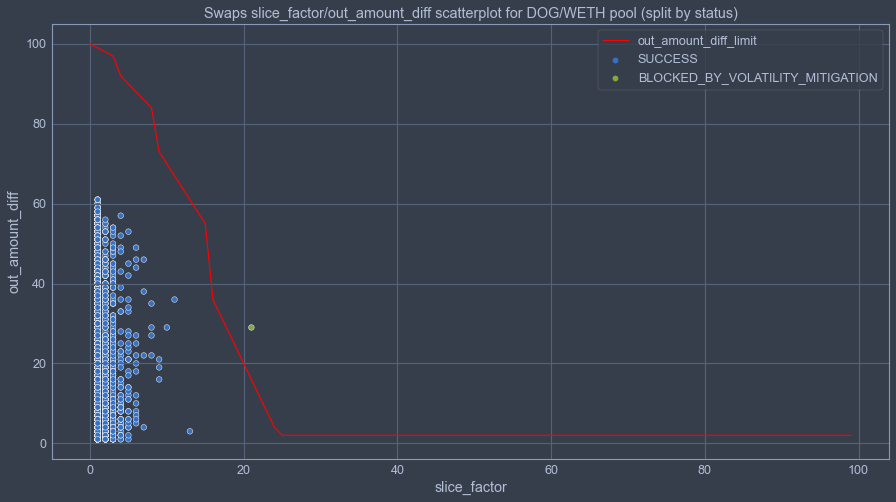

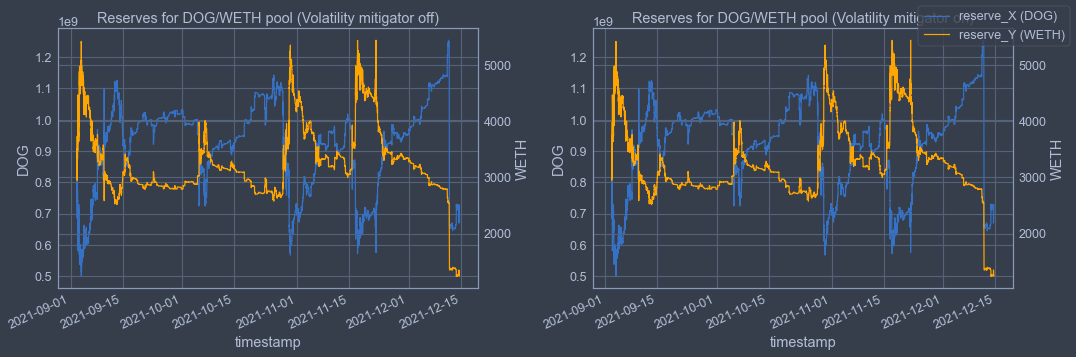

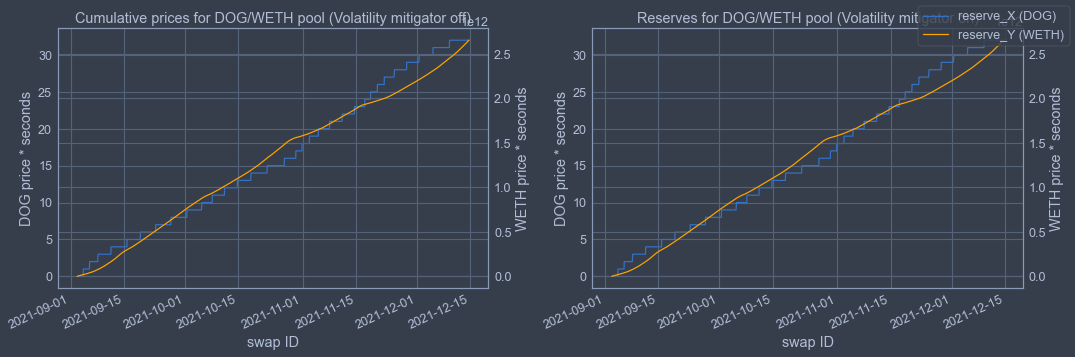

In [9]:
dog_weth_sim.show_mitigation_comparison(dog_weth_swaps_mitigation_off_df, dog_weth_swaps_mitigation_on_df)
dog_weth_sim.px_hist_blocked_transactions_slice(dog_weth_swaps_mitigation_on_df)
dog_weth_sim.px_hist_blocked_transactions_difference_from_oracle(dog_weth_swaps_mitigation_on_df)
dog_weth_sim.plot_slice_distribution_and_diff_limit_line(dog_weth_swaps_mitigation_on_df)
dog_weth_sim.plot_reserves_with_and_without_mitigation(dog_weth_swaps_mitigation_off_df, dog_weth_swaps_mitigation_on_df)
dog_weth_sim.plot_cumulative_prices_with_and_without_mitigation(dog_weth_swaps_mitigation_off_df, dog_weth_swaps_mitigation_off_df)

# LADY/WETH

Original LADY/WETH pool has next statuses counts:
SUCCESS                1524
NOT_ENOUGH_RESERVES     212
Name: status, dtype: int64
Mitigated LADY/WETH dataframe has next statuses counts:
SUCCESS                             1361
NOT_ENOUGH_RESERVES                  374
BLOCKED_BY_VOLATILITY_MITIGATION       1
Name: status, dtype: int64
TWAP unavailability ratio for LADY/WETH is 0.0069124423963133645
Mitigated LADY/WETH dataframe has next Mitigator statuses:


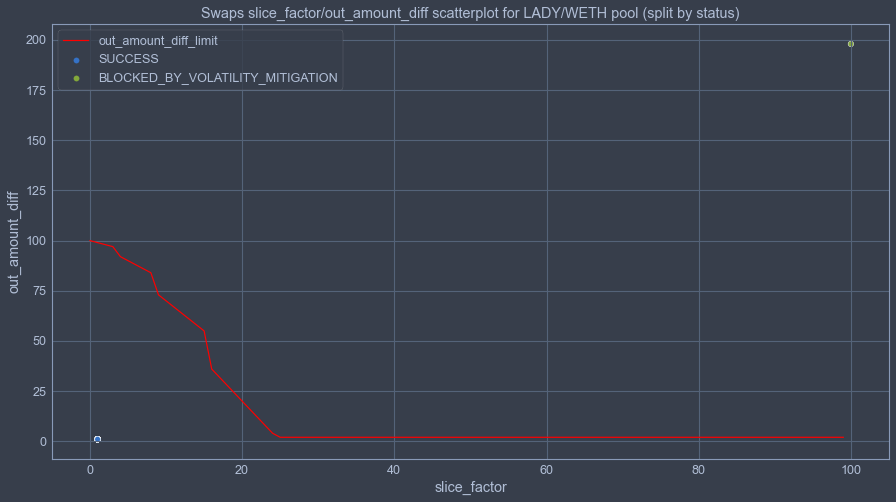

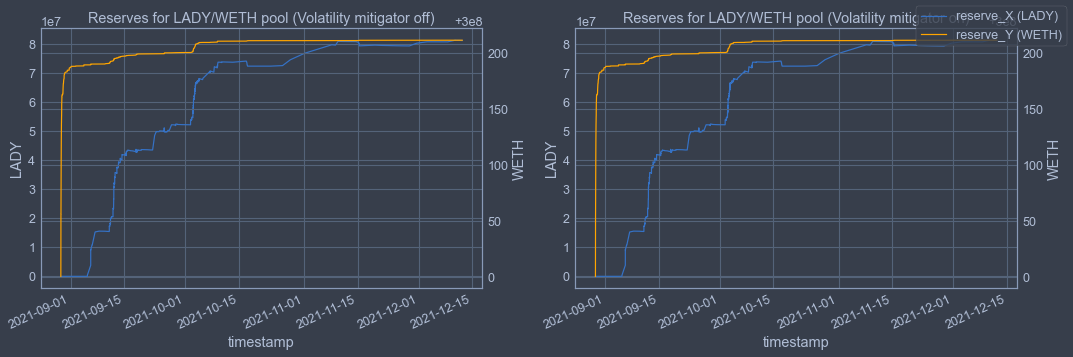

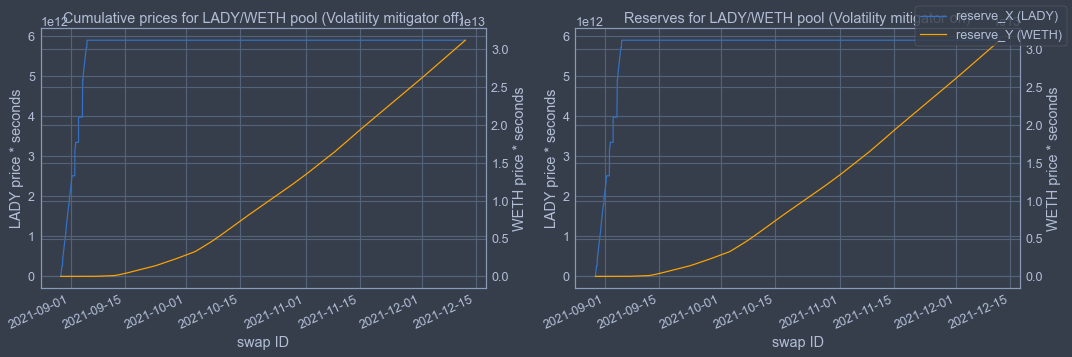

In [10]:
lady_weth_sim.show_mitigation_comparison(lady_weth_swaps_mitigation_off_df, lady_weth_swaps_mitigation_on_df)
lady_weth_sim.px_hist_blocked_transactions_slice(lady_weth_swaps_mitigation_on_df)
lady_weth_sim.px_hist_blocked_transactions_difference_from_oracle(lady_weth_swaps_mitigation_on_df)
lady_weth_sim.plot_slice_distribution_and_diff_limit_line(lady_weth_swaps_mitigation_on_df)
lady_weth_sim.plot_reserves_with_and_without_mitigation(lady_weth_swaps_mitigation_off_df, lady_weth_swaps_mitigation_on_df)
lady_weth_sim.plot_cumulative_prices_with_and_without_mitigation(lady_weth_swaps_mitigation_off_df, lady_weth_swaps_mitigation_off_df)

# NFD/WETH

Original NFD/WETH pool has next statuses counts:
SUCCESS                17957
NOT_ENOUGH_RESERVES      821
Name: status, dtype: int64
Mitigated NFD/WETH dataframe has next statuses counts:
SUCCESS                             10922
NOT_ENOUGH_RESERVES                  7179
BLOCKED_BY_VOLATILITY_MITIGATION      677
Name: status, dtype: int64
TWAP unavailability ratio for NFD/WETH is 5.3253807647246777e-05
Mitigated NFD/WETH dataframe has next Mitigator statuses:


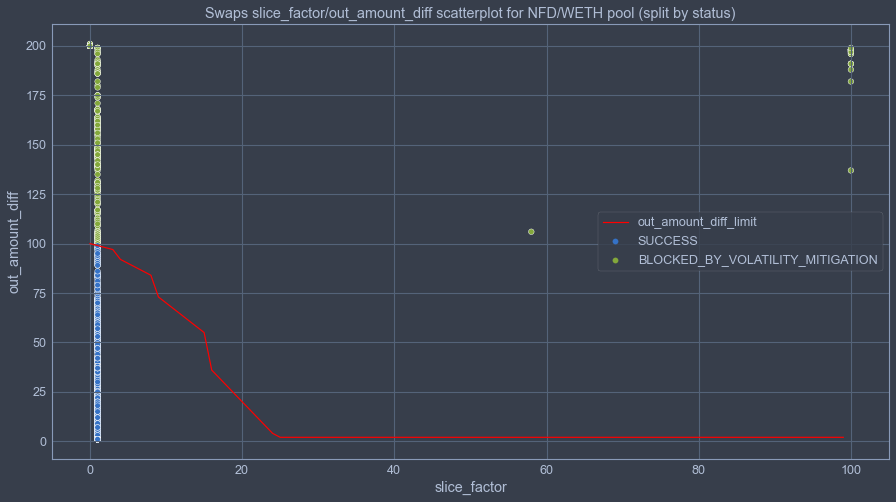

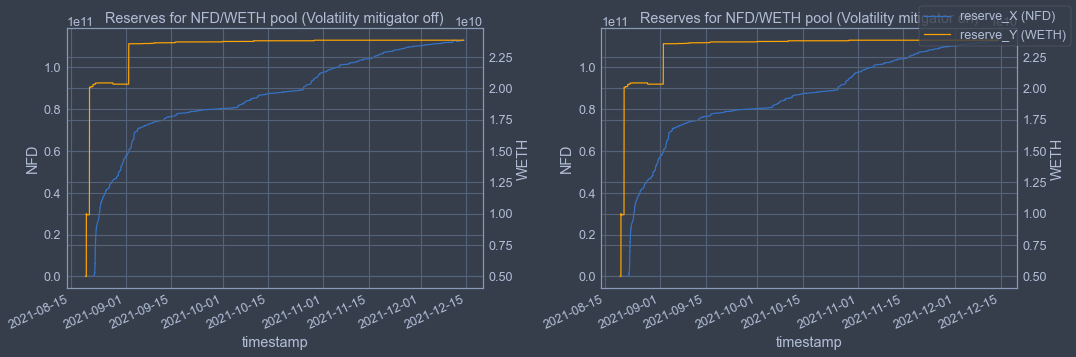

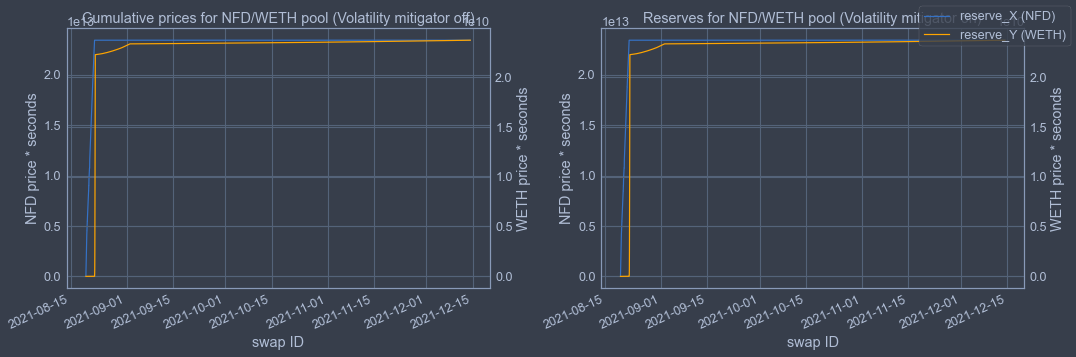

In [11]:
nfd_weth_sim.show_mitigation_comparison(nfd_weth_swaps_mitigation_off_df, nfd_weth_swaps_mitigation_on_df)
nfd_weth_sim.px_hist_blocked_transactions_slice(nfd_weth_swaps_mitigation_on_df)
nfd_weth_sim.px_hist_blocked_transactions_difference_from_oracle(nfd_weth_swaps_mitigation_on_df)
nfd_weth_sim.plot_slice_distribution_and_diff_limit_line(nfd_weth_swaps_mitigation_on_df)
nfd_weth_sim.plot_reserves_with_and_without_mitigation(nfd_weth_swaps_mitigation_off_df, nfd_weth_swaps_mitigation_on_df)
nfd_weth_sim.plot_cumulative_prices_with_and_without_mitigation(nfd_weth_swaps_mitigation_off_df, nfd_weth_swaps_mitigation_off_df)

# TIARA/WETH

Original TIARA/WETH pool has next statuses counts:
SUCCESS    177
Name: status, dtype: int64
Mitigated TIARA/WETH dataframe has next statuses counts:
BLOCKED_BY_VOLATILITY_MITIGATION    111
SUCCESS                              66
Name: status, dtype: int64
TWAP unavailability ratio for TIARA/WETH is 0.06779661016949153
Mitigated TIARA/WETH dataframe has next Mitigator statuses:


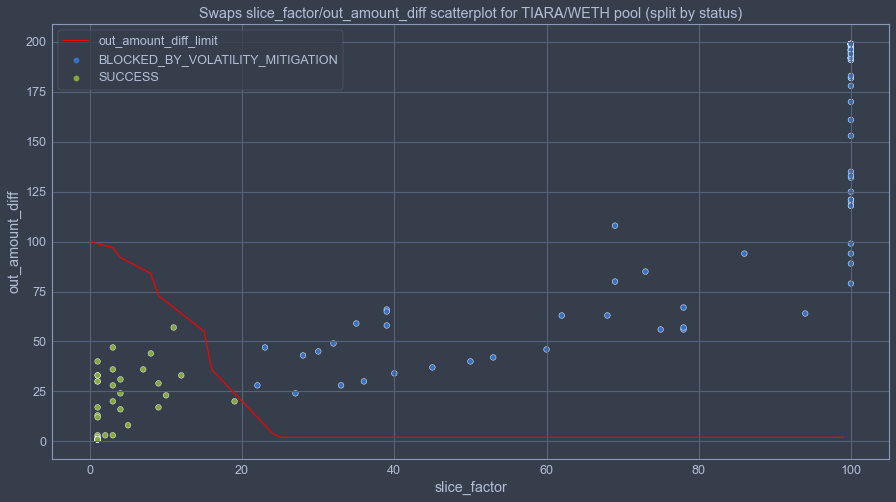

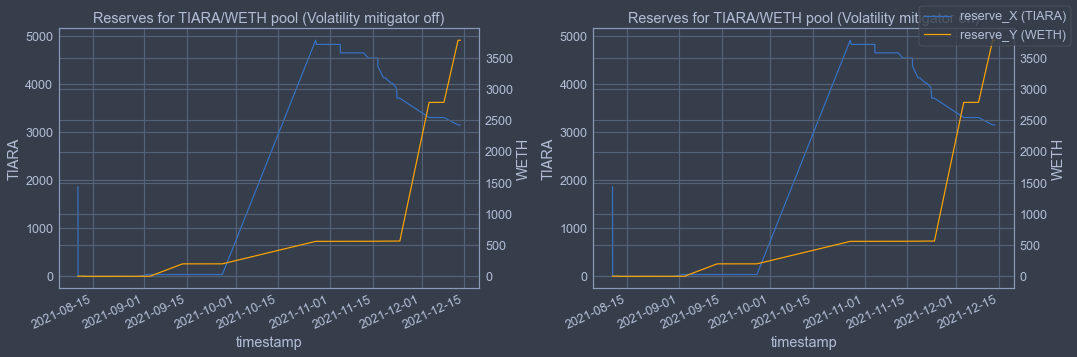

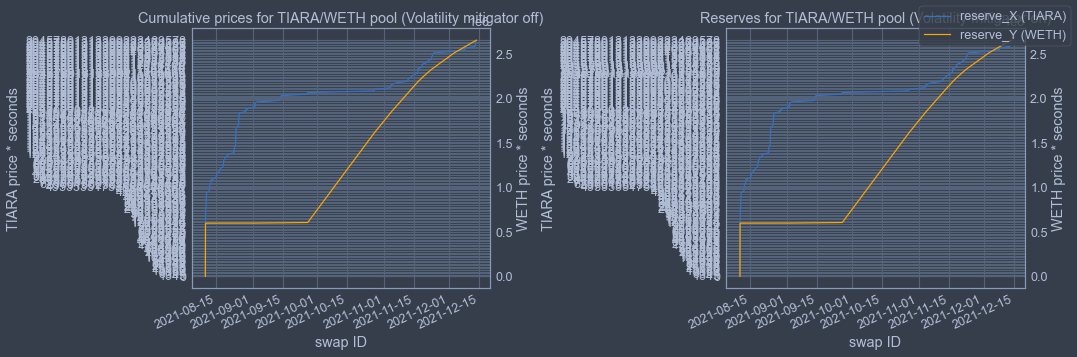

In [12]:
tiara_weth_sim.show_mitigation_comparison(tiara_weth_swaps_mitigation_off_df, tiara_weth_swaps_mitigation_on_df)
tiara_weth_sim.px_hist_blocked_transactions_slice(tiara_weth_swaps_mitigation_on_df)
tiara_weth_sim.px_hist_blocked_transactions_difference_from_oracle(tiara_weth_swaps_mitigation_on_df)
tiara_weth_sim.plot_slice_distribution_and_diff_limit_line(tiara_weth_swaps_mitigation_on_df)
tiara_weth_sim.plot_reserves_with_and_without_mitigation(tiara_weth_swaps_mitigation_off_df, tiara_weth_swaps_mitigation_on_df)
tiara_weth_sim.plot_cumulative_prices_with_and_without_mitigation(tiara_weth_swaps_mitigation_off_df, tiara_weth_swaps_mitigation_off_df)